# Finch Carr - Homework 05
- I want to work carefully through a numeric/simulated solution to Bayes' Theorem
- Bayes' Theorem can be defined as $P(signal|data)=\frac{P(data|signal)P(signal)}{P(data)}$
## Problem 1)
- I need to create a normal distribution background with a million background events.

In [1]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

Text(0.5, 0, 'Observed data, $P(d|s)$')

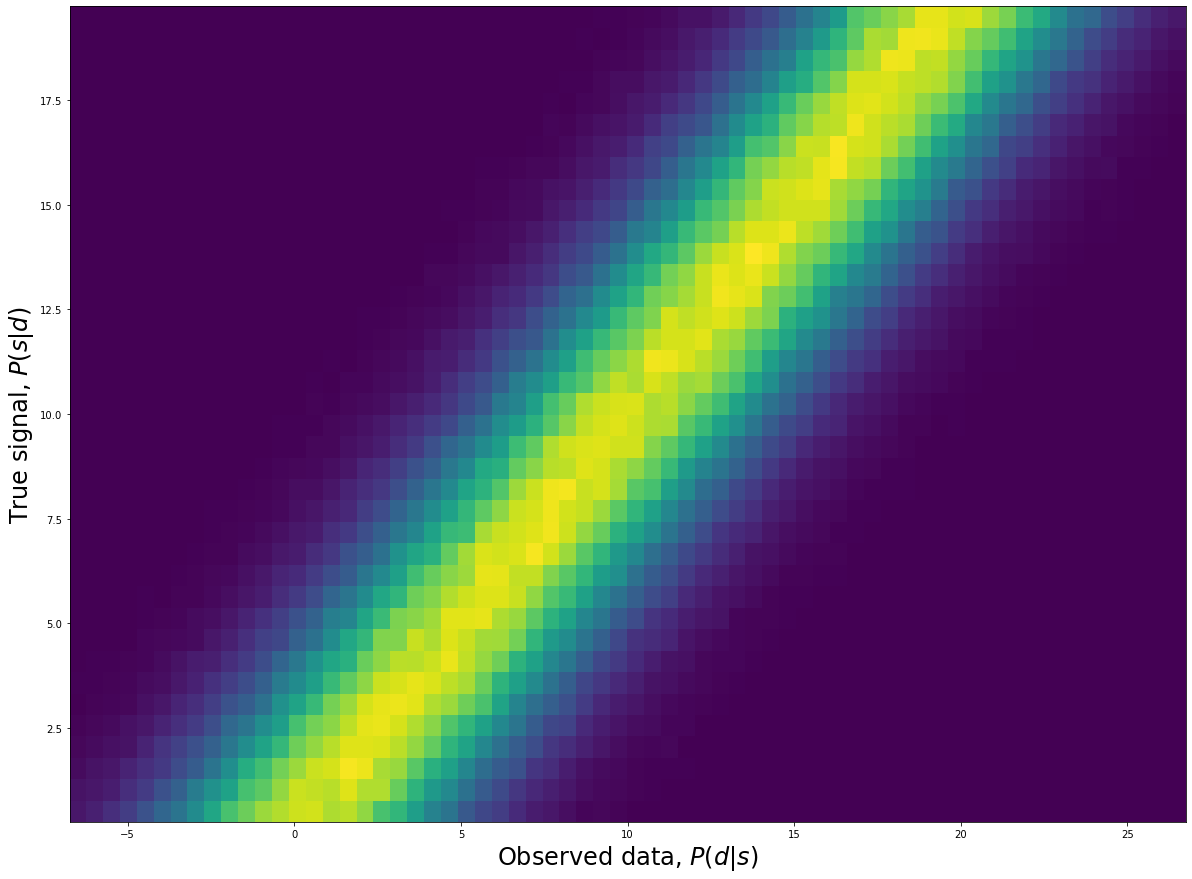

In [2]:
bkgd = stats.norm.rvs(loc=0, scale=3, size=1000000)
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000)

data = bkgd + signal
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

- I want to select a true injected signal and plot the probability of the data giving me that signal with a stair plot
  - Graphically, I am setting a specific y-value, and plotting the probabilities of what I may observe given said y-value of true signal

In [ ]:
fig, ax = plt.subplot(1,1)
plt.yscale('log')
ax.step(data, signal)

[16.870835415931946, 13.619263963039556, 10.766364236453622, 11.878066482125492, 8.144869847950993, 9.495301391626999, 13.259758718392149, 10.502860141581412, 11.851787017274313, 12.270143823720133, 12.134003759956004, 13.47786751356171]


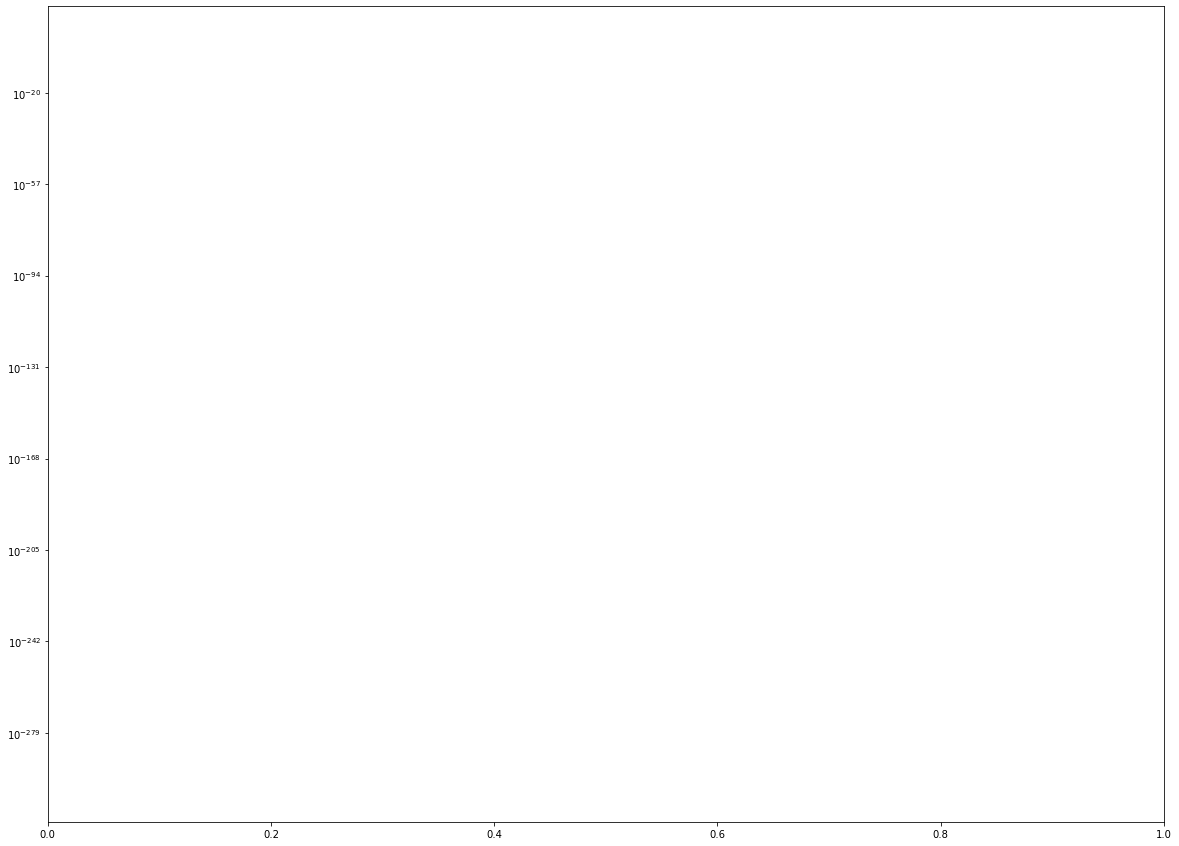

In [46]:
xsliceA = []
for i in range(len(data)):
    if signal[i] >= 12.00 and signal[i] <= 12.01:
        xsliceA.append(data[i])

# The loop creates an array that graphically is a horizontal slice at a 
# y-value of 12, and finds every value in the observed data that could be 
# observed if the true signal is 12.

print(xsliceA[0:12]) # First dozen or so values of probability distribution

fig, ax = plt.subplots(1,1)
plt.yscale('log')
# NEED TO PLOT STEP PLOT